In [22]:
# loeme sisse vajalikud paketid
# numpy & pandas -> data manipulation
# yfinance aitab finants tickers sisse võtta
import numpy as np 
import yfinance as yf
import pandas as pd 
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
import matplotlib
%matplotlib inline


In [23]:
#loeme sisse S&P500 indexsi SPY 
df = yf.download("SPY", start="2003-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed


In [24]:
#saab ka lugeda sisse mitmeid tickereid korraga
#microsoft, coca-cola, apple, google, nike, visa, kellogs, 20 aasta võlakiri ETF,  
#Seekord võtame ainult SPY

symbols_multiple = "MSFT", "KO", "AAPL", "GOOG", "NKE", "V", "K", "TLT", 
symbols = "SPY" 

In [25]:
#df -> dataframe
#df_multiple_symbols -> lisame ylevalt symbolid sisse 
df = yf.download(symbols, start="2013-01-01", end="2023-01-01")
df_multiple_symbols = yf.download(symbols_multiple, start="2013-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  8 of 8 completed


In [26]:
#vaatame dataframe
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,145.110001,146.149994,144.729996,146.059998,120.399666,192059000
2013-01-03,145.990005,146.369995,145.339996,145.729996,120.127686,144761800
2013-01-04,145.970001,146.610001,145.669998,146.369995,120.655174,116817700
2013-01-07,145.850006,146.110001,145.429993,145.970001,120.325523,110002500
2013-01-08,145.710007,145.910004,144.979996,145.550003,119.979279,121265100
...,...,...,...,...,...,...
2022-12-23,379.649994,383.059998,378.029999,382.910004,380.042480,59857300
2022-12-27,382.790009,383.149994,379.649994,381.399994,378.543793,51638200
2022-12-28,381.329987,383.390015,376.420013,376.660004,373.839294,70911500


In [27]:
#võtame Close dataframist
close = df["Close"]

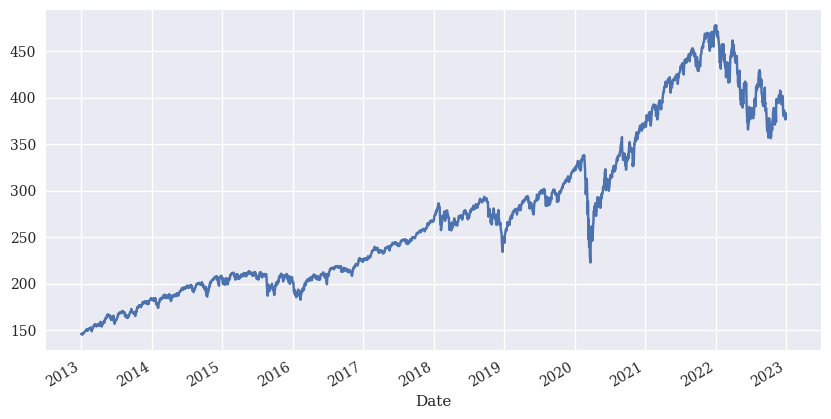

In [28]:
#SPY close hind pildina
close.plot(figsize=(10,5), subplots=True);

In [29]:
#SPY close hind yhikud, mea, standard deviation, min, 25%, 50%, 75%, max
close.describe().round(2) 

count    2518.00
mean      273.95
std        86.89
min       145.55
25%       205.14
50%       258.24
75%       326.81
max       477.71
Name: Close, dtype: float64

In [30]:
#SPY close hind erinevad mõõtmed, 2 kohta peale koma
close.aggregate([min, np.mean, np.std, np.median,max]).round(2)

min       145.55
mean      273.95
std        86.89
median    258.24
max       477.71
Name: Close, dtype: float64

In [31]:
#SPY percent hinnamuutus võtame 3 peale koma
close.pct_change().round(3).head()

Date
2013-01-02      NaN
2013-01-03   -0.002
2013-01-04    0.004
2013-01-07   -0.003
2013-01-08   -0.003
Name: Close, dtype: float64

In [32]:
#close diff().mean()
close.diff().mean()

0.09390941403146107

In [33]:
#dataframe mitmed symbolid ja close hind ainult
df_multiple_symbols = df_multiple_symbols["Close"] 

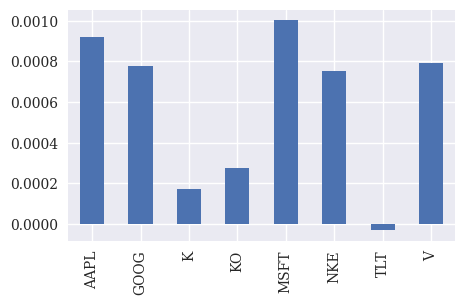

In [34]:
#mitmed symbolid nende precent vahe ja mean
df_multiple_symbols.pct_change().mean().plot(kind='bar', figsize=(5, 3));

In [35]:
#logaritmilised return vektori moodi
rets = np.log(df_multiple_symbols / df_multiple_symbols.shift(1))

In [36]:
rets.head().round(3) 

,AAPL,GOOG,K,KO,MSFT,NKE,TLT,V
Date,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.013,0.001,-0.007,0.000,-0.013,0.010,-0.014,0.001
2013-01-04,-0.028,0.020,0.002,0.002,-0.019,0.010,0.004,0.008
2013-01-07,-0.006,-0.004,0.000,-0.010,-0.002,0.002,0.000,0.007
2013-01-08,0.003,-0.002,0.003,-0.007,-0.005,-0.011,0.007,0.009


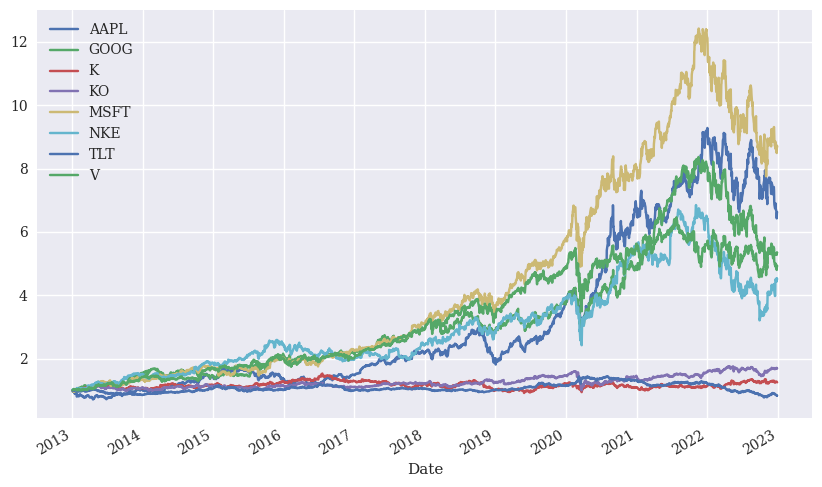

In [37]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));